# Exploratory Data Analysis in Python

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initial exploration

EDA is the process of reviewing and cleaning data to:
- derive insights
- generate hypotheses

In [2]:
books = pd.read_csv("databases/clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


For checking NaN

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [4]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

For summary statistics

In [5]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


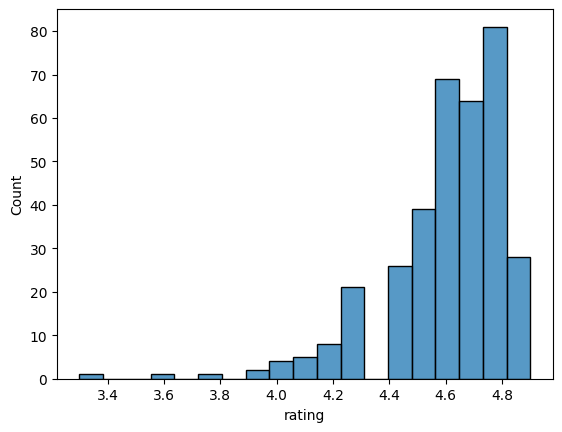

In [6]:
sns.histplot(data=books, x="rating")
plt.show()

## Data Validation

To get data types

In [7]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

We see that year is an int as it shoud be, but if it was saved as a float we could have converted it into integer:

In [8]:
books["year"] = books["year"].astype(int)

Validating categorical data

In [9]:
books["genre"].isin(["Fiction", "Non Fiction"])
#Returns True if the value is in the list and False if it isn't

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

To reverse this process and return False if the value is in the list we use ```~```:

In [10]:
~books["genre"].isin(["Fiction", "Non Fiction"])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

Filtering the data to only those values which are in our list

In [11]:
books[books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


**Remember that we have to pass into ```isin()``` a list, even if we have a single value**

To select and view only numeric columns

In [28]:
books.select_dtypes("number").head() #number displays both int and float

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [29]:
books.select_dtypes("object").head()

,name,author,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Childrens


Checking max and min values

In [13]:
print(books["year"].max())
print(books["year"].min())

2019
2009


Visualizing

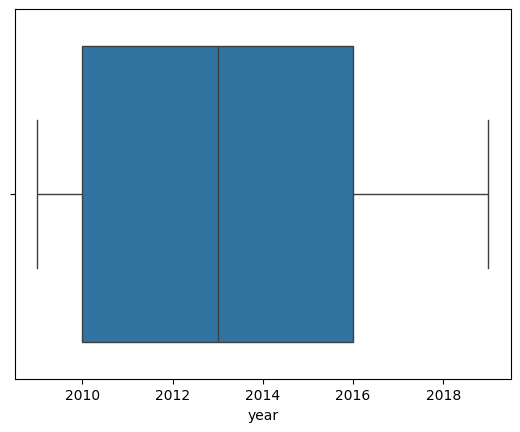

In [14]:
sns.boxplot(data=books, x="year")
plt.show()

The 25th and 75th percentile are 2010 and 2016 respectively and the median year is 2013

We can also highlight different genres

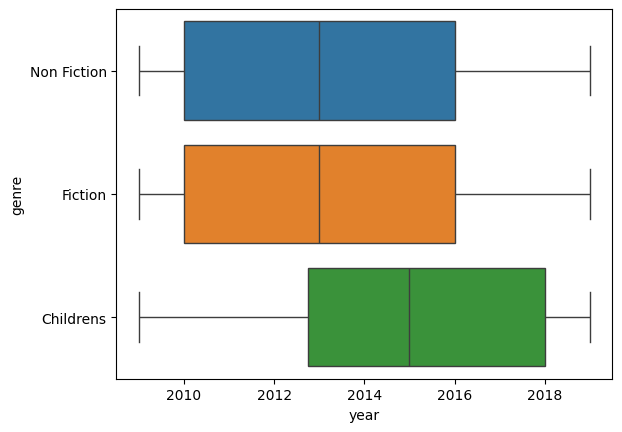

In [15]:
sns.boxplot(data=books, x="year", y="genre", hue="genre")
plt.show()

## Data summarization

In [17]:
books.groupby("genre")[["rating", "year"]].mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


- ```.sum()```
- ```.count()```
- ```.min()```
- ```.max()```
- ```.var()```
- ```.std()```

```.agg()``` applies aggregating functions across a DataFrame

In [19]:
books[["rating", "year"]].agg(["mean", "std"])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


Specifying which aggregations should be applied to which column

In [20]:
books.agg({"rating": ["mean", "std"], "year": ["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


**Named summary columns:**

each names tuple should include a column name (```ratings```) followed by an aggregating function to apply to that column (```mean```), the name of the tuple becomes the name of the resulting column

In [21]:
books.groupby("genre").agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", "std"),
    median_year=("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


**Visualizing categorical summaries**

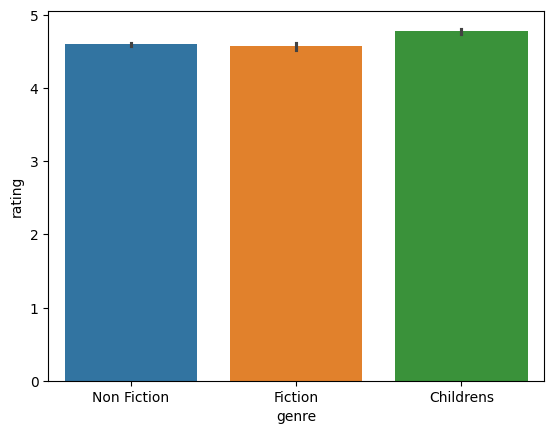

In [23]:
sns.barplot(data=books, x="genre", y="rating", hue="genre")
plt.show()

## Addressing missing data